In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np

from general_utils.files_utils import DirectoryUtils, FileUtils

abs_path = DirectoryUtils.getRosPkgPath('create_dataset')

In [2]:
objects_list = ["000_cereal_box_UO", "001_chips_can",
"002_master_chef_can", "003_cracker_box", "004_sugar_box",
"005_tomato_soup_can", "006_mustard_bottle", "007_tuna_fish_can", "008_pudding_box",
"009_gelatin_box", "010_potted_meat_can", "011_banana", "012_strawberry", "013_apple",
"014_lemon", "015_peach", "016_pear", "017_orange", "018_plum", "019_pitcher_base",
"021_bleach_cleanser", "024_bowl", "025_mug", "026_sponge", "027_skillet", "029_plate",
"030_fork", "031_spoon", "032_knife", "033_spatula", "035_power_drill", "036_wood_block",
"037_scissors", "038_padlock", "040_large_marker", "042_adjustable_wrench",
"043_phillips_screwdriver", "044_flat_screwdriver", "048_hammer", "050_medium_clamp",
"051_large_clamp", "052_extra_large_clamp", "053_mini_soccer_ball", "054_softball",
"055_baseball", "056_tennis_ball", "057_racquetball", "058_golf_ball", "059_chain",
"061_foam_brick", "062_dice", "063-a_marbles", "063-b_marbles", "065-a_cups",
"065-b_cups", "065-c_cups", "065-d_cups", "065-e_cups", "065-f_cups", "065-g_cups",
"065-h_cups", "065-i_cups", "065-j_cups", "070-a_colored_wood_blocks", "070-b_colored_wood_blocks",
"071_nine_hole_peg_test", "072-a_toy_airplane", "072-b_toy_airplane", "072-c_toy_airplane",
"072-d_toy_airplane", "072-e_toy_airplane", "073-a_lego_duplo", "073-b_lego_duplo",
"073-c_lego_duplo", "073-d_lego_duplo", "073-e_lego_duplo", "073-f_lego_duplo", 
"073-g_lego_duplo", "077_rubiks_cube"]

objects_list = ["000_cereal_box_UO", "001_chips_can", "002_master_chef_can",
                "006_mustard_bottle"]

data_set_path = os.path.join(abs_path, "YCB_virtual")
print("objects: ", len(objects_list))
print(data_set_path)

objects:  4
/home/devan/GIT/Juskeshino/catkin_ws/src/mapless_navigation/create_dataset/YCB_virtual


In [3]:
# Replace directory
DirectoryUtils.replaceDir(data_set_path)

# Source images path
source_images_path = os.path.join(abs_path, "Source_images")
print(source_images_path)


Directory created
/home/devan/GIT/Juskeshino/catkin_ws/src/mapless_navigation/create_dataset/Source_images


In [4]:
def boxes_from_mask(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # convert to grayscale
    thresh = cv2.threshold(gray, 8, 255, cv2.THRESH_BINARY)[1]  # threshold
    # get contours
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    boxes = []
    for cntr in contours:
        x, y, w, h = cv2.boundingRect(cntr)
        #cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 5)
        #print("x,y,w,h:", x, y, w, h)
        boxes.append(((x, y), (x+w, y+h)))
    return boxes

000_cereal_box_UO-01.png
Box: ((141, 123), (350, 325))

001_chips_can-01.png
Box: ((133, 138), (265, 265))

002_master_chef_can-01.png
Box: ((268, 180), (361, 306))

006_mustard_bottle-01.png
Box: ((155, 187), (233, 258))
006_mustard_bottle-02.png
Box: ((133, 131), (200, 223))



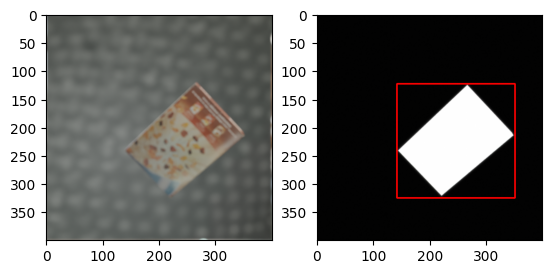

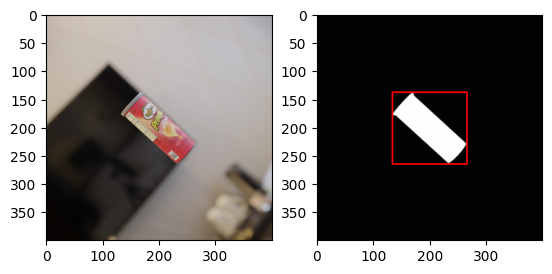

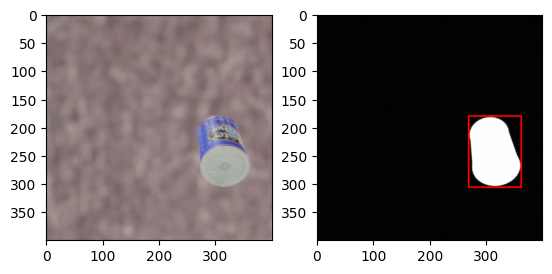

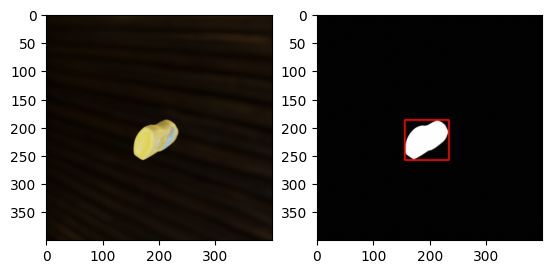

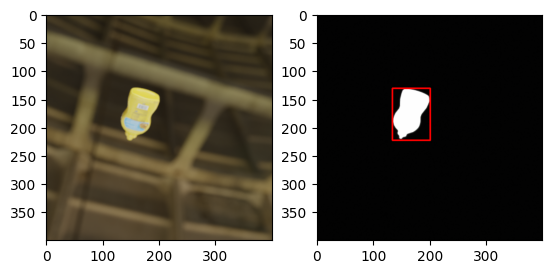

In [5]:
import glob

for object_name in objects_list:
    ob_list = glob.glob(source_images_path + "/" + object_name + "*[!_mask].*")
    ob_list.sort()
    for file_name in ob_list:
        print(file_name.split('/')[-1])
        img = FileUtils.loadImage(file_name)
        mask_path, _, extension = file_name.partition('.')
        mask_path += "_mask." + extension
        mask_img = FileUtils.loadImage(mask_path)
        mask_img = cv2.bitwise_not(mask_img)

        boxes = boxes_from_mask(mask_img)
        # TODO: loop for multiple boxes
        box = boxes[0]
        print("Box:", box)
        result = mask_img.copy()
        cv2.rectangle(result, box[0], box[1], (255, 0, 0), 2)

        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(img)
        axarr[1].imshow(result)

    print()

# -------------------


In [ ]:
img_path = os.path.join(abs_path, "scripts")
print(img_path)
img = FileUtils.loadImage(img_path + "/languages.png")
print(img.shape)
plt.imshow(img)

In [ ]:
resized_img = FileUtils.resizeImage(img, 200)
print(resized_img.shape)
plt.imshow(resized_img)

In [ ]:
FileUtils.saveImage(resized_img, "copy2.png")